## 🎓 MACHINE LEARNING EXERCISE: PREDICTING CUSTOMER PURCHASES AFTER VIEWING ADS

---

### 🔍 Problem Description:
Company A is running advertising campaigns on social media and wants to predict whether a user visiting their website after seeing an
ad will make a purchase.

This prediction helps the company optimize its ad budget and focus more effectively on potential buyers.

---

### 📥 Input Features:
You’re given a dataset containing the following user information:

Age: User's age

Gender: User’s gender

EstimatedSalary: Estimated salary

TimeOnPage: Time spent browsing the website

AdsViewed: Number of times the user saw the ad

ClickedAd: Whether the user clicked on the ad (0 = No, 1 = Yes)

Registered: Whether the user registered for an account (0 = No, 1 = Yes)

---

### 🎯 Target Output:
Purchased (1 = Made a purchase, 0 = Did not purchase)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Loading data**

In [2]:
df = pd.read_csv('../data/demo1_LogR.csv',index_col='User ID')
df

,Gender,Age,EstimatedSalary,Purchased
User ID,,,,
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
...,...,...,...,...
15691863,Female,46,41000,1
15706071,Male,51,23000,1
15654296,Female,50,20000,1


In [3]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## **2. Feature Classification**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.6+ KB


In [5]:
numerical = ['Age','EstimatedSalary']
categorical = ['Gender']

In [6]:
df['Gender'] = df['Gender'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 15624510 to 15594041
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           400 non-null    category
 1   Age              400 non-null    int64   
 2   EstimatedSalary  400 non-null    int64   
 3   Purchased        400 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 13.0 KB


In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
df.describe(include='category')

,Gender
count,400
unique,2
top,Female
freq,204


## **3. Exploratory Data Analysis (EDA)**

In [9]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [10]:
df['Age'].value_counts()

Age
35    32
37    20
26    16
42    16
41    16
39    15
40    15
48    14
47    14
27    13
38    13
36    12
46    12
28    12
30    11
31    11
49    10
29    10
32     9
24     9
33     9
60     7
45     7
19     7
59     7
20     7
25     6
52     6
58     6
23     6
34     6
18     5
22     5
57     5
53     5
21     4
54     4
50     4
55     3
51     3
56     3
43     3
44     2
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [12]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
99000      1
129000     1
46000      1
64000      1
139000     1
Name: count, Length: 117, dtype: int64

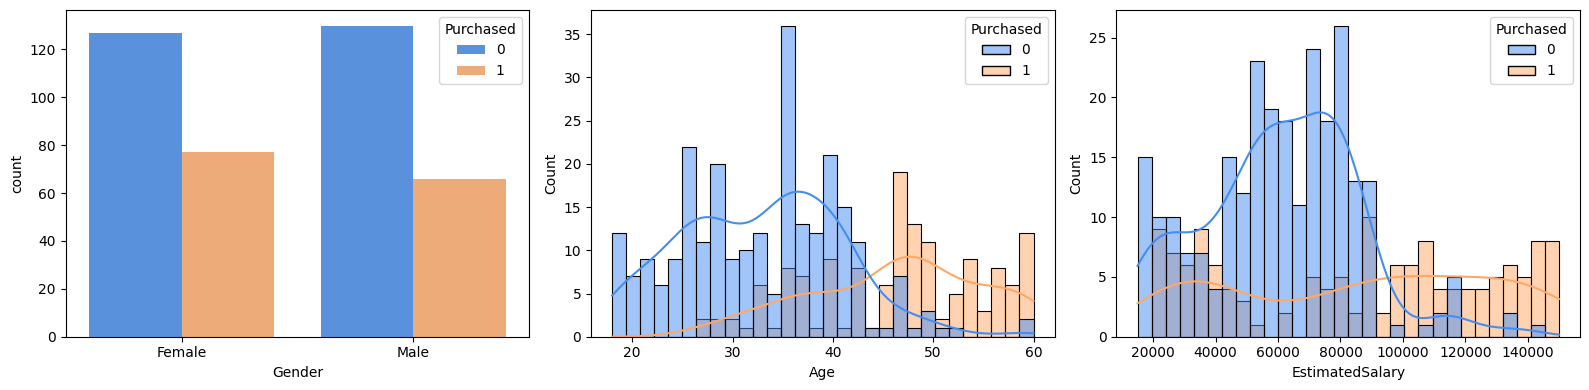

In [13]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(16,4))
sns.countplot(data=df,x='Gender',hue='Purchased',ax=ax[0],palette=["#448DF3","#FFA865"])
sns.histplot(data=df,x='Age',hue='Purchased',bins=30,ax=ax[1],kde=True,palette=["#448DF3","#FFA865"])
sns.histplot(data=df,x='EstimatedSalary',bins=30,hue='Purchased',ax=ax[2],kde=True,palette=["#448DF3","#FFA865"])
plt.tight_layout()
plt.show()

## **4. Feature Engineering & Data Wrangling** 

In [14]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
df = pd.get_dummies(df,columns=['Gender'],drop_first=True)
df

,Age,EstimatedSalary,Purchased,Gender_Male
User ID,,,,
15624510,19,19000,0,True
15810944,35,20000,0,True
15668575,26,43000,0,False
15603246,27,57000,0,False
15804002,19,76000,0,True
...,...,...,...,...
15691863,46,41000,1,False
15706071,51,23000,1,True
15654296,50,20000,1,False


## **5. Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
X = df.drop(columns='Purchased')
X

,Age,EstimatedSalary,Gender_Male
User ID,,,
15624510,19,19000,True
15810944,35,20000,True
15668575,26,43000,False
15603246,27,57000,False
15804002,19,76000,True
...,...,...,...
15691863,46,41000,False
15706071,51,23000,True
15654296,50,20000,False


In [18]:
y = df['Purchased']
y

User ID
15624510    0
15810944    0
15668575    0
15603246    0
15804002    0
           ..
15691863    1
15706071    1
15654296    1
15755018    0
15594041    1
Name: Purchased, Length: 400, dtype: int64

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2025)

In [20]:
logr_model = LogisticRegression(max_iter=1000)
logr_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
logr_model.score(X_val,y_val)

0.9

In [22]:
y_pred = logr_model.predict(X_val)

Accuracy: 0.9
Classification report:               precision    recall  f1-score   support

           0       0.89      0.96      0.93        52
           1       0.92      0.79      0.85        28

    accuracy                           0.90        80
   macro avg       0.90      0.87      0.89        80
weighted avg       0.90      0.90      0.90        80



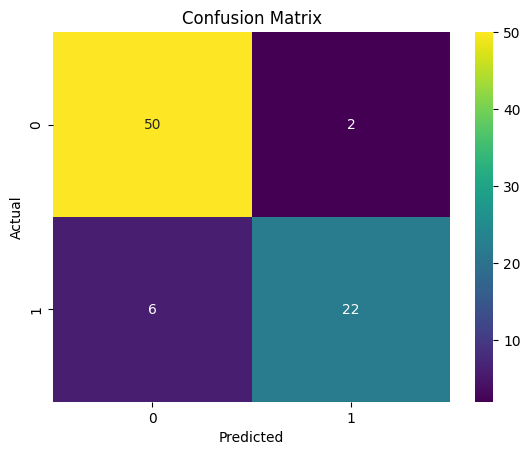

In [31]:
print(f'Accuracy: {accuracy_score(y_val,y_pred)}')
print(f'Classification report: {classification_report(y_val,y_pred)}')
confusion_matrix
sns.heatmap(confusion_matrix(y_val,y_pred),cmap='viridis',annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()